<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/Outlier_detection_pca_20231008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [145]:
lst = list(range(1,31))
lst1 = []
for i in lst:
  a = 'pca_' + str(i)
  lst1.append(a)

In [146]:
path = "/content/BasePFLD.csv"
df = pd.read_csv(path)
display(df.head())
data = df.values
data

,Unnamed: 0,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,0,80,100,100,100,100,100,100,70,100,...,65,65,70,80,80,90,80,100,90,100
1,1,100,100,100,100,100,100,100,70,100,...,85,85,70,80,80,90,80,100,90,100
2,2,80,100,100,100,100,100,100,70,100,...,85,65,90,80,80,90,80,100,90,100
3,3,100,100,100,100,100,100,100,70,100,...,85,85,90,80,80,90,80,100,90,100
4,4,80,100,100,100,100,100,100,70,100,...,65,85,70,80,80,90,80,100,90,100


array([[    0,    80,   100, ...,   100,    90,   100],
       [    1,   100,   100, ...,   100,    90,   100],
       [    2,    80,   100, ...,   100,    90,   100],
       ...,
       [26748,    20,    10, ...,    15,     5,    10],
       [26749,    20,    10, ...,    15,     5,    10],
       [26750,    20,    10, ...,    15,     5,    10]])

In [147]:
data_mean_centered = data - np.mean(data, axis=0)

data_scaled = data_mean_centered / np.std(data_mean_centered, axis=0)

# Paso 3: Realizar el Análisis de Componentes Principales (PCA)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
pca = PCA(n_components=30)
pca_result = pca.fit_transform(data_scaled)
df_pca_result = pd.DataFrame(data = pca_result, columns = lst1)
df_pca_result.tail()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30
26746,-4.518668,-0.747355,-0.307509,-0.427958,-0.282786,-0.327000,-0.048899,-0.835715,-0.278730,-0.273871,...,-0.185831,-0.020005,0.048432,0.041893,0.096613,-0.081358,0.035377,0.013581,0.049624,0.000984
26747,-4.429479,-0.507541,0.158526,-0.409916,-0.112279,0.027307,0.499865,0.195584,-0.309902,0.302275,...,-0.015997,0.171474,-0.115767,-0.014132,-0.027961,-0.032044,0.032238,-0.037677,-0.017286,0.001567
26748,-4.204357,-0.438083,0.295617,-0.337228,-0.331344,0.106043,0.620986,-0.182919,0.043357,-0.012951,...,0.003379,-0.098687,0.012725,-0.069090,0.037359,-0.055229,-0.020315,-0.039788,0.039323,0.004366
26749,-4.480040,-0.753131,-0.377283,-0.683656,-0.039784,-0.236967,-0.421548,0.287247,0.165674,-0.296289,...,-0.238913,0.082254,0.115637,-0.007827,0.145680,0.052735,0.101751,0.015487,-0.021029,0.003947
26750,-4.288221,-0.617222,0.009337,-0.403115,-0.095303,0.066223,0.374601,-0.918227,-0.589256,0.446312,...,0.026712,-0.033151,-0.021513,0.002900,0.039665,-0.100173,-0.008408,-0.008129,0.047783,0.002531


In [148]:
resultados = pd.DataFrame(pca.explained_variance_ratio_, columns = ['explained_var_ratio'])
resultados['var_cum_sum'] = resultados.explained_var_ratio.cumsum()
resultados.head()

,explained_var_ratio,var_cum_sum
0,0.786485,0.786485
1,0.053776,0.840261
2,0.031772,0.872033
3,0.024657,0.896690
4,0.015597,0.912288


Text(0.5, 1.0, 'PCA')

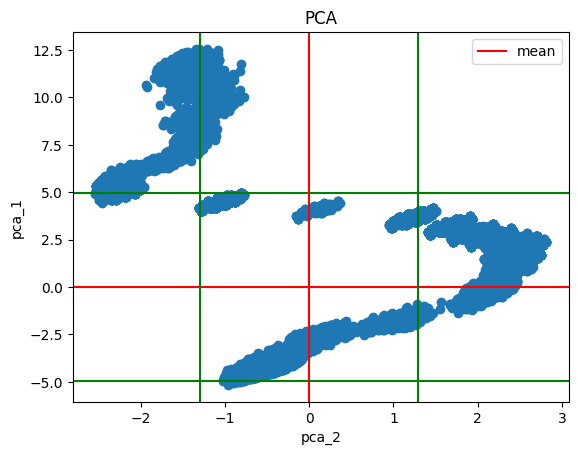

In [149]:
fact = 1
compM = 'pca_2'
compN = 'pca_1'
x = df_pca_result.loc[:, compM]
y = df_pca_result.loc[:, compN]

plt.scatter(x, y)
plt.xlabel(compM)
plt.ylabel(compN)

plt.axhline(y = y.mean(), color = 'r', linestyle = '-', label='mean')
plt.axhline(y = y.std()*fact, color = 'g', linestyle = '-')
plt.axhline(y = -y.std()*fact, color = 'g', linestyle = '-')

plt.axvline(x = x.mean(), color = 'r', linestyle = '-')
plt.axvline(x = x.std()*fact, color = 'g', linestyle = '-')
plt.axvline(x = -x.std()*fact, color = 'g', linestyle = '-')
plt.legend()
plt.title('PCA')


Text(0.5, 1.0, 'PCA')

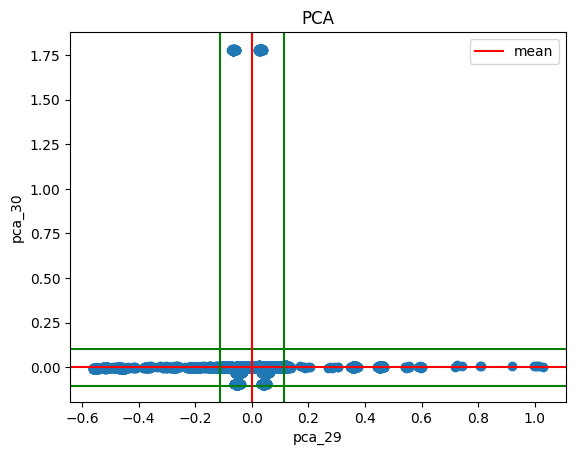

In [150]:
fact = 1
compM = 'pca_29'
compN = 'pca_30'
x = df_pca_result.loc[:, compM]
y = df_pca_result.loc[:, compN]

plt.scatter(x, y)
plt.xlabel(compM)
plt.ylabel(compN)

plt.axhline(y = y.mean(), color = 'r', linestyle = '-', label='mean')
plt.axhline(y = y.std()*fact, color = 'g', linestyle = '-')
plt.axhline(y = -y.std()*fact, color = 'g', linestyle = '-')

plt.axvline(x = x.mean(), color = 'r', linestyle = '-')
plt.axvline(x = x.std()*fact, color = 'g', linestyle = '-')
plt.axvline(x = -x.std()*fact, color = 'g', linestyle = '-')
plt.legend()
plt.title('PCA')

Text(0.5, 1.0, 'PCA')

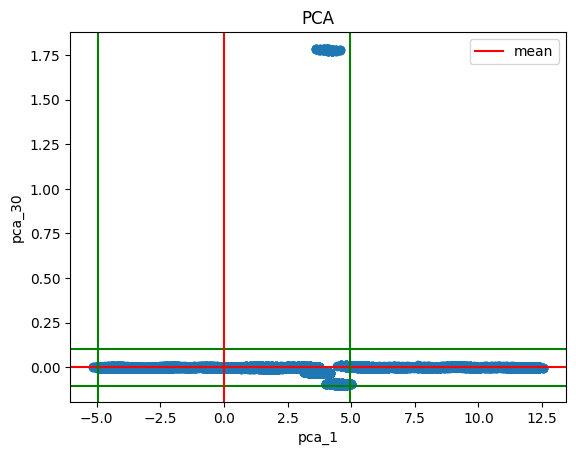

In [151]:
fact = 1
compM = 'pca_1'
compN = 'pca_30'
x = df_pca_result.loc[:, compM]
y = df_pca_result.loc[:, compN]

plt.scatter(x, y)
plt.xlabel(compM)
plt.ylabel(compN)

plt.axhline(y = y.mean(), color = 'r', linestyle = '-', label='mean')
plt.axhline(y = y.std()*fact, color = 'g', linestyle = '-')
plt.axhline(y = -y.std()*fact, color = 'g', linestyle = '-')

plt.axvline(x = x.mean(), color = 'r', linestyle = '-')
plt.axvline(x = x.std()*fact, color = 'g', linestyle = '-')
plt.axvline(x = -x.std()*fact, color = 'g', linestyle = '-')
plt.legend()
plt.title('PCA')

In [152]:
matriz_de_puntos12 = df_pca_result.loc[:, ['pca_1', 'pca_2']].values
punto_12 = df_pca_result.loc[:, ['pca_1', 'pca_2']].mean().values
distancias12 = np.linalg.norm(matriz_de_puntos12 - punto_12, axis=1)

matriz_de_puntos2930 = df_pca_result.loc[:, ['pca_29', 'pca_30']].values
punto_2930= df_pca_result.loc[:, ['pca_29', 'pca_30']].mean().values
distancias2930= np.linalg.norm(matriz_de_puntos2930 - punto_2930, axis=1)

matriz_de_puntos1_30 = df_pca_result.loc[:, ['pca_1', 'pca_30']].values
punto_1_30= df_pca_result.loc[:, ['pca_1', 'pca_30']].mean().values
distancias1_30= np.linalg.norm(matriz_de_puntos1_30 - punto_1_30, axis=1)

dists = pd.DataFrame(data = distancias12, columns =['dist_1_2'])
dists['dist_29_30']=distancias2930
dists['dist_1_30']=distancias1_30

dists.sort_values(by=['dist_29_30'])

,dist_1_2,dist_29_30,dist_1_30
22286,4.945918,0.000101,4.844175
26543,4.536717,0.000126,4.455706
15963,3.754522,0.000129,3.753182
22103,4.870987,0.000146,4.811498
14586,3.888853,0.000182,3.863476
...,...,...,...
4794,3.919452,1.782943,4.303416
4841,4.075509,1.783544,4.446236
4793,3.764180,1.783853,4.165290
4789,3.928875,1.784561,4.314678


In [153]:
pct_low = .10
pct_high = .80
dists['outlier_1_2']   = np.where(dists.loc[:,'dist_1_2'] > dists.loc[:,'dist_1_2'].quantile(pct_high )  , 1,0 )
dists['outlier_29_30'] = np.where(dists.loc[:,'dist_29_30'] > dists.loc[:,'dist_29_30'].quantile(pct_high) , 1,0 )
dists['outlier_1_30']  = np.where(dists.loc[:,'dist_1_30'] > dists.loc[:,'dist_1_30'].quantile(pct_high)  , 1,0 )
dists['outlier_2cases_a']  = np.where((dists.loc[:,'outlier_1_2'] ==1) & (dists.loc[:,'outlier_29_30'] ==1)  , 1,0 )
dists['outlier_2cases_b']  = np.where((dists.loc[:,'outlier_1_2'] ==1) & (dists.loc[:,'outlier_1_30'] ==1)  , 1,0 )
dists['outlier_2cases_c']  = np.where((dists.loc[:,'outlier_1_30'] ==1) & (dists.loc[:,'outlier_29_30'] ==1)  , 1,0 )
dists['outlier_2cases_d']  = np.where((dists.loc[:,'outlier_1_30'] ==1) & (dists.loc[:,'outlier_29_30'] ==1) & (dists.loc[:,'outlier_1_2'] ==1) , 1,0 )

display(dists.head())
display(dists.describe())

,dist_1_2,dist_29_30,dist_1_30,outlier_1_2,outlier_29_30,outlier_1_30,outlier_2cases_a,outlier_2cases_b,outlier_2cases_c,outlier_2cases_d
0,11.237263,0.094602,11.136841,1,1,1,1,1,1,1
1,12.048187,0.112822,11.964216,1,1,1,1,1,1,1
2,12.331713,0.121246,12.243980,1,1,1,1,1,1,1
3,12.316413,0.072103,12.236615,1,0,1,0,1,0,0
4,11.571826,0.079733,11.504850,1,0,1,0,1,0,0


,dist_1_2,dist_29_30,dist_1_30,outlier_1_2,outlier_29_30,outlier_1_30,outlier_2cases_a,outlier_2cases_b,outlier_2cases_c,outlier_2cases_d
count,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000,26751.000000
mean,4.601613,0.071536,4.321316,0.199993,0.199993,0.199993,0.109641,0.196329,0.108519,0.107323
std,2.207585,0.135692,2.391266,0.400002,0.400002,0.400002,0.312447,0.397228,0.311041,0.309529
min,1.549640,0.000101,0.000836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.668173,0.019921,3.456789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.144978,0.044117,4.099357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.521324,0.068942,4.469910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.618903,1.784569,12.559177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
resultados = pd.concat([df, df_pca_result, dists], axis =1 )
resultados.head()

,Unnamed: 0,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,...,dist_1_2,dist_29_30,dist_1_30,outlier_1_2,outlier_29_30,outlier_1_30,outlier_2cases_a,outlier_2cases_b,outlier_2cases_c,outlier_2cases_d
0,0,80,100,100,100,100,100,100,70,100,...,11.237263,0.094602,11.136841,1,1,1,1,1,1,1
1,1,100,100,100,100,100,100,100,70,100,...,12.048187,0.112822,11.964216,1,1,1,1,1,1,1
2,2,80,100,100,100,100,100,100,70,100,...,12.331713,0.121246,12.243980,1,1,1,1,1,1,1
3,3,100,100,100,100,100,100,100,70,100,...,12.316413,0.072103,12.236615,1,0,1,0,1,0,0
4,4,80,100,100,100,100,100,100,70,100,...,11.571826,0.079733,11.504850,1,0,1,0,1,0,0


<Axes: xlabel='pca_1', ylabel='pca_2'>

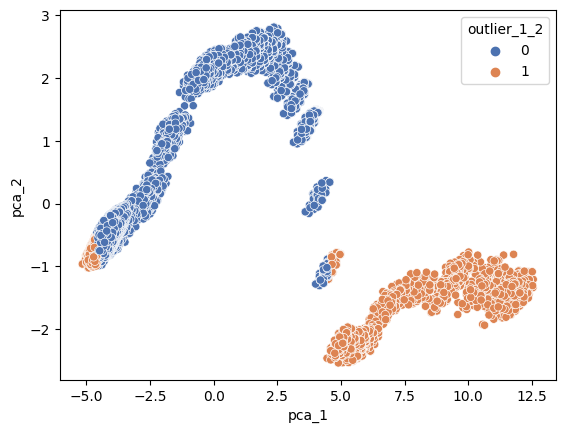

In [155]:
sns.scatterplot(data=resultados, x="pca_1", y="pca_2", hue="outlier_1_2", palette="deep")

<Axes: xlabel='pca_29', ylabel='pca_30'>

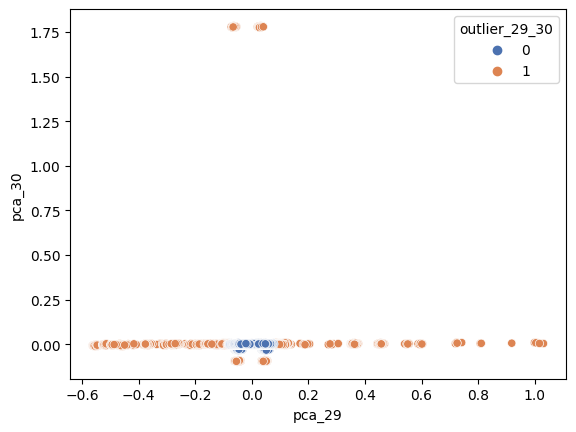

In [156]:
sns.scatterplot(data=resultados, x="pca_29", y="pca_30", hue="outlier_29_30", palette="deep")


<Axes: xlabel='pca_1', ylabel='pca_30'>

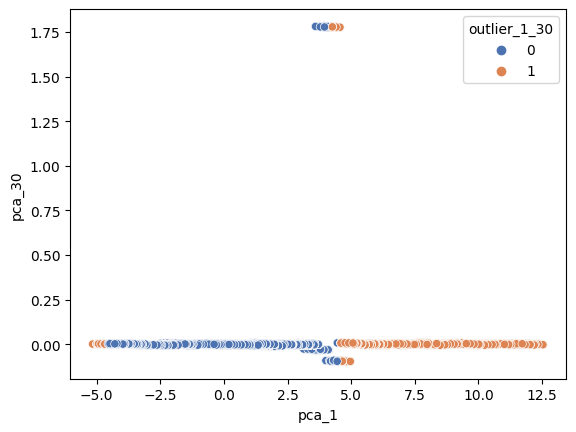

In [157]:
sns.scatterplot(data=resultados, x="pca_1", y="pca_30", hue="outlier_1_30", palette="deep")


In [158]:
resultados.query("outlier_2cases_c==1").shape

(2903, 71)

In [159]:
resultados.query("outlier_2cases_a==1").shape

(2933, 71)

In [160]:
resultados.query("outlier_2cases_b==1").shape

(5252, 71)

In [161]:
resultados.query("outlier_2cases_d==1").shape

(2871, 71)

In [162]:

resultados.to_csv('resultados_pca_outlier_20231008.csv')